# <font color='blue'>Coleta de dados no Twitter utilizando pacote Tweepy do Python</font>

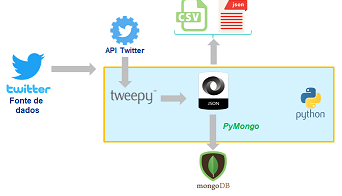


<div style="text-align: right">
    <b>Bootcamp Engenharia de Dados</b><br>
    <i>Aquecimento e regras do jogo</i><br>
    <b>Professora:</b> <i>Fernanda Farinelli</i><br>
</div>

Este notebook demonstra os seguintes exemplos:<br>
1. Postar tweets via API
2. Buscar os tweets de um determinado usuário (timeline)
3. Realizar retweets via API
4. Realizar a busca dos trends tweets
  * Trends em múltiplas localizações
  * Trends no Brasil
5. Realizar a busca por palavra chave
6. Analisar o resultado dos tweets coletados
7. Armazenar o tweets coletados:
  * Armazenar em arquivo JSON
  * Armazenar em arquivo CSV
  * Armazenar no MongoDB
  * Armazenar no MySQL


<b>OBSERVAÇÃO: Antes de utilizar qualquer pacote, é <font color='red'>SEMPRE necessário instalar</font> o(s) pacote(s) previamente. A instalação só é necessária uma única vez.</b>

* Para instalar pelo Jupyter, utilize o comando abaixo:<br>
 * <font color='green'>!pip install nome_do_pacote</font>
    


In [ ]:
#Instalação de pacotes
#Deve ser realizado apenas na primeira vez que for utilizar

!pip install tweepy
!pip install pymongo

**OBSERVAÇÃO:**
A documentação completa do pacote *tweepy* está disponível no link abaixo:
* http://docs.tweepy.org/en/v3.5.0/api.html

**<font color='red'>SEMPRE é necessário importar</font>**  o(s) pacote(s) que serão usados no seu script.

In [ ]:
#Import package

import tweepy


### <font color='blue'>Credenciais para utilização da API do Twitter</font>

Para utilizar a API do twitter, é necessário ter uma conta no twitter, solicitar o acesso de desenvolvedor, criar sua aplicação, gerar suas credenciais.

In [ ]:
# Credenciais para utilização da API do Twitter

# Observação, as credenciais abaixo são falsas.
# Para este notebook funcionar você precisa criar suas próprias credenciais e informá-las nas respectivas variáveis abaixo:

API_Key = "RgoeD4hnRASDY2fOJHJYjTToopk"
API_secret_key = "AS7uFwE2utdDESopYjdnnG7xDaRZgDLF8s6oMOTCXSrvvd1Atp"

access_token = "15975346852145698745-6mWDFGHldyXasdfDSo0fCcUaHaDSee"
access_token_secret = "Ukazg00W9W5idDFRd5aFGH81pvUcAs8Wasweudfradf5fd"

Fazer a autenticação na API usando suas credenciais

In [ ]:
#Realizar autenticação no Twitter
auth = tweepy.OAuthHandler(API_Key, API_secret_key)
auth.set_access_token(access_token, access_token_secret)

# Construir uma instancia da API
api = tweepy.API(auth)

No exemplo acima, criamos a variável api que é uma instância/token já autenticado no twitter. Neste caso, o token usará as configurações padrões para busca de tweets.

### Postar tweets via API

In [ ]:
# Post/create a tweet
api.update_status("Exemplo de tweet com python e pacote Tweepy. #igti #bootcampEngenhariaDeDadosIGTI")

In [ ]:
api.update_status("Exemplo de tweet com python e pacote Tweepy \n #igti #bootcampEngenhariaDeDadosIGTI")

api.update_status(" Conheça o Bootcamp de Engenharia de Dados do @IGTI. \n \
                  Acesse: https://www.igti.com.br/custom/engenharia-de-dados/ \n \
                  #igti #bootcampEngenhariaDeDadosIGTI")

In [ ]:
# Post/create a tweet
api.update_status("Conheça o Google Colab para usar em suas aplicações de Ciência de Dados. \n
Acesse este post: https://medium.com/@leonardopiechacaldeira/guia-explicativo-para-usar-o-google-colab-para-ci%C3%AAncia-de-dados-86fc6458dd9c \n
#bootcampEngenhariaDeDadosIGTI #datadriven")

In [ ]:
# Post/create a tweet
api.update_status("Olá Mundo ARJ! #igti")

api.update_status("Exemplo de tweet com python e pacote Tweepy \n #igti #bootcampEngenhariaDeDadosIGTI")

api.update_status(" Conheça o Bootcamp de Engenharia de Dados do @IGTI. \n \
Acesse: https://www.igti.com.br/custom/engenharia-de-dados/ \n \
#igti #bootcampEngenhariaDeDadosIGTI")

### Realizar a busca de tweets de um usuário.

In [ ]:
#Realizar autenticação no Twitter
auth = tweepy.OAuthHandler(API_Key, API_secret_key)
auth.set_access_token(access_token, access_token_secret)

# Construct the API instance
api = tweepy.API(auth)

In [ ]:
userName = "ProfessoraIGTI"
userID = "IgtiProfessora"

In [ ]:
#Buscar tweets de um determinado usuário (timeline do usuário)

user_tweets = api.user_timeline(screen_name=userID,                            
                           count=200, # Buscar no máximo 200 tweets
                           include_rts = False, #Não incluir retweets                           
                           tweet_mode = 'extended' # Necessario para buscar o full_text (280 caracteres)
                           )

In [ ]:
#Exibir o 3 tweets mais atuais

for user_tweet in user_tweets[:3]:
    print("ID: {}".format(user_tweet.id))
    print(user_tweet.created_at)
    print(user_tweet.full_text + "\n")

### Post um retweet

In [ ]:
#Pegar o ID do tweet, no caso é o último tweet do usuário pesquisado

tweetID = user_tweets[0].id

In [ ]:
print(tweetID)

In [ ]:
# Retweetar o respectivo tweet 

api.retweet(tweetID)

### Realizar a busca dos trends tweets.

##### Trends em múltiplas localizações

In [ ]:
# To fetch the Available Locations that Twitter has trending topic information for.

available_loc = api.trends_available()

In [ ]:
#Print first vector element
available_loc[0]

In [ ]:
print("The number of locations available are : " + str(len(available_loc)))

In [ ]:
print("Some of the locations are : ") 
for i in range(0, 200, 20): 
    print("Place : " + available_loc[i]['name'] +
          ", Country : " + available_loc[i]['country']) 

##### Trends no Brasil

In [ ]:
# WOEID (Where On Earth IDentifier) do Brasil: 23424768
# Veja: https://en.wikipedia.org/wiki/WOEID

BRAZIL_WOEID = 23424768

In [ ]:
brazil_trends = api.trends_place(BRAZIL_WOEID)

In [ ]:
print("O nummero de trends para esta localização é: " + str(len(brazil_trends)))

In [ ]:
#Imprimir primeiro elemento do vetor

brazil_trends[0]["trends"][0]

In [ ]:
# #Imprimir 5 primeiros elementos do vetor 

print("Os top 5 trends desta localização são:\n")
for i in range(0, 5): 
    print(str(i) + ' - ' + brazil_trends[0]['trends'][i]['name']) 
    #print(brazil_trends[0]['trends'][i]) 

In [ ]:
#Imprimir todo o vetor, apenas a coluna 'name'

print("Os top trends desta localização são: \n") 
  
for value in brazil_trends: 
    for trend in value['trends']: 
        print(trend['name'])

Os métodos <i>trends_available</i> e <i>trends_place</i> retorna um conjunto de objetos com informações dos tópicos no formato JSON.

### Realizar a busca por palavra chave.

In [ ]:
#Define palavra chave da busca

keyword = ("'irpf' OR 'imposto de renda' OR '#IRPF2021' OR '#ImpostoDeRenda'")

#keyword = ('vacina')
#keyword = ("covid-19  OR  covid  OR  coronavirus OR pandemic")

In [ ]:
# Define listas de armazenamento

tweets = []   # apenas tweet text
info = []     # todo o resultado da busca (JSON)

Nova autenticação para buscar mais tweets que a taxa limite da chamada.

<font color=red><b>onde:</b></font>
* <b><i>retry_count</i></b> - número padrão de tentativas para tentar quando ocorrer um erro
* <b><i>retry_delay</i></b> - número de segundos para aguardar entre tentativas
* <b><i>wait_on_rate_limit</i></b> - se deve ou não esperar automaticamente a reposição dos limites de taxa
* <b><i>wait_on_rate_limit_notify</i></b> - Imprima ou não uma notificação quando o Tweepy estiver aguardando a reposição dos limites de taxa

In [ ]:
# Construir a instancia da API (Já foi realizado antes)

token  = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)


In [ ]:
# Executa a busca por palavra chave

for tweet in tweepy.Cursor(token.search,
                           q=keyword, tweet_mode='extended',
                           rpp=2000, #busca até 2000 tweets, no máximo 100 por chamada, limitado a 18000 a cada 15 minutos
                           result_type="mixed", # popular, recent ou mixed
                           lang='pt', #serão solicitados apenas tweets em português
                           include_entities=True).items(2000):   
        
    if 'retweeted_status' in dir(tweet): # Checa se é Retweet
        
        # Se status é um Retweet, status.full_text (tweet.full_text) pode estar truncado.
        # Assim, nó buscamos o campo retweeted_status.full_text
        aux=tweet.retweeted_status.full_text       
    
    else: # Não é um Retweet
        aux=tweet.full_text
        
    newtweet = aux.replace("\n", " ")
   
    tweets.append(newtweet) #anexar o texto do tweet a essa lista
    info.append(tweet) #anexar todo o resultado deste tweet a essa lista
    
    #open arquivo txt no modo anexar (append "a") e escrever o resultado no arquivo
    
    file = open("tweets_Keyword_irpf.txt", "a", -1, "utf-8")    
    file.write(newtweet+'\n')
    file.close()


Para realizar a busca por palavra chave vamos utilizar a função abaixo:<br>
* <font color=green>API.search(q[, lang][, locale][, rpp][, page][, since_id][, geocode][, show_user])</font><br><br>
**onde os principais parâmetros que serão usados são:**

* <font color=blue>q</font> - a string de consulta de pesquisa
* <font color=blue>lang</font> - Restringe os tweets para o idioma especificado, fornecido por um código ISO 639-1.
  - lang=pt -> Português
  - lang=en -> Inglês
* <font color=blue>rpp</font> - O número de tweets a serem retornados por página, até no máximo 100.
* <font color=blue>page</font> - O número da página (começando em 1) a ser retornado, até um máximo de aproximadamente 1500 resultados (com base na página rpp).
* <font color=blue>since_id</font>  - Retorna apenas status com um ID maior que (ou seja, mais recente que) o ID especificado.
* <font color=blue>geocode</font>  - Retorna tweets de usuários localizados em um determinado raio da latitude / longitude especificada.
* <font color=blue>show_user</font>  - Quando verdadeiro, precede "<user>:" no início do tweet. O padrão é falso.
* <font color=blue>include_entities</font> - O nó de entidades não será incluído quando definido como false. O padrão é true. 
    - Detalhes sobre este nó, acesse https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/entities-object

* <font color=blue>tweet_mode</font> - Define qual o campo de texto que será recuperado, texto completo (280 caracteres) ou busca o texto do tweet truncado( 140 caracteres).
    - tweets = token.search(q=keyword,lang='pt') --> 140 caracteres 
    - tweets = token.search(q=keyword,tweet_mode='extended') -->280 caracteres

* <font color=blue>result_type</font> - Define o tipo do tweet a ser recuperado, onde pode ser o mais popular (result_type="popular"), mais recente (result_type="recent") ou uma combinação dos dois (result_type="mixed")    
    

In [ ]:
# Para verificar a quantidade de tweets coletado use a função "len()"

print("Total de tweets coletados %s." % (len(info)))

### <font color=blue>Armazenar o tweets coletados</font> 

##### <font color=red>Armazenar em arquivo JSON</font>

In [ ]:
#Install
#!pip install json

#Import
import json

In [ ]:
# writing a JSON file that has the available trends around the world

with open("tweets_irpf_pt.json","w") as filename: #open file in write mode


    for tweet in info: #para cada tweet no vetor de resultados tweets
        
        status = tweet
        
        #converte para string        
        json_str = json.dumps(status._json)
        
        #deserializa a string para um objeto python do tipo dict        
        parsed = json.loads(json_str)
        
        #grava o tweet deserializado no arquivo
        filename.write(json.dumps(parsed, indent=4))

    

##### <font color=red>Armazenar em arquivo CSV</font>

In [ ]:
#Install
#!pip install pandas
#!pip install numpy

#Import
import pandas as pd
import numpy as np

Para mais detalhes sobre o pacote **Pandas** acesse:
* https://pandas.pydata.org/
* https://medium.com/data-hackers/uma-introdu%C3%A7%C3%A3o-simples-ao-pandas-1e15eea37fa1

Para mais detalhes sobre o pacote **Numpy** acesse:
* https://numpy.org/
* https://medium.com/ensina-ai/entendendo-a-biblioteca-numpy-4858fde63355

In [ ]:
#Define um dataframe para armazenar os dados dos tweets

tweets_df = pd.DataFrame(tweets, columns=['Tweets']) #Store tweet text from tweets list

tweets_df['len']  = np.array([len(tweet) for tweet in tweets])  #Store tweet text size from tweets list

tweets_df['ID']   = np.array([tweet.id for tweet in info])
tweets_df['USER']   = np.array([tweet.user.screen_name for tweet in info])
tweets_df['userName'] = np.array([tweet.user.name for tweet in info])
tweets_df['User Location']    = np.array([tweet.user.location for tweet in info])
tweets_df['Language'] = np.array([tweet.user.lang for tweet in info])
tweets_df['Date'] = np.array([tweet.created_at for tweet in info])
tweets_df['Source'] = np.array([tweet.source for tweet in info])
tweets_df['Likes']  = np.array([tweet.favorite_count for tweet in info])
tweets_df['Retweets']    = np.array([tweet.retweet_count for tweet in info])


# Escrever/gravar arquivo CSV a partir do dataframe
tweets_df.to_csv("tweets_Keyword_vacina.csv")

In [ ]:
#Print first 3 rows of dataframe
tweets_df.head(3)

In [ ]:
#Podemos imprimir o nome do usuário (screen_name) e o texto do tweet
tweet = info[0]

print("Usuário: %s "% {tweet.user.screen_name})
print("  Tweet: %s"  % {tweet.full_text}) #No caso da busca em tweet_mode='extended' (até 280 caracteres)

#print("  Tweet: %s"  % {tweet.text}) # Se a busca não foi em tweet_mode='extended'  (até 140 caracteres)


### <font color=blue>Analisar o resultado dos tweets coletados</font> 

#### <font color=red>Identificar Top Tweets coletados</font>

In [ ]:
# Tweets com maior número de LIKES
likes_max = np.max(tweets_df['Likes']) #Função max do numpy identifica o valor máximo

likes = tweets_df[tweets_df.Likes == likes_max].index[0] #pega o primeiro tweet com valor máximo de curtidas

print("O tweet com mais curtidas (likes) é: \n{}".format(tweets_df['Tweets'][likes]))
print("Número de curtidas: {}".format(likes_max))

In [ ]:
retweet_max  = np.max(tweets_df['Retweets']) #retorna o valor máximo

retweet  = tweets_df[tweets_df.Retweets == retweet_max].index[0] #pega o primeiro tweet com valor máximo de Retweets

print("O tweet com mais retweet é: \n{}".format(tweets_df['Tweets'][retweet]))
print("Número de retweets: {}".format(retweet_max))

##### <font color=red>Armazenar no MongoDB</font>

In [ ]:
#Install
#!pip install pymongo

#Import pymongo

import pymongo

In [ ]:
#Conexão ao banco de dados
con = pymongo.MongoClient('localhost', 27017) # neste caso o mongodb está instalado na máquina local

#seleciona o banco de dados
db = con.twitterdb

In [ ]:
#seleciona a coleção para armazenar os tweets

collection = db.tweets_irpf

In [ ]:
#lista a quantidade de tweets existentes na coleção

db.tweets_irpf.count_documents({})

In [ ]:
i = 0
#para cada tweet no vetor de resultados tweets

for tweet in info:
    db.tweets_irpf.insert_one(tweet._json)
    i=i+1
    #print("Tweet inserido com sucesso !!")

In [ ]:
#lista a quantidade de tweets inseridos

print("Quantidade de tweets inseridos: %s" % i)

In [ ]:
#lista a quantidade de tweets existentes na coleção

db.tweets_irpf.count_documents({})

##### <font color=red>Armazenar no MySQL</font>

In [ ]:
#importar pacote
import mysql.connector

Conectar ao MySQL Server selecionand um banco de dados específico

In [ ]:
# conectar ao esquema do mysql server

mydb = mysql.connector.connect(
    host='localhost',  # neste caso o mysql server está instalado na máquina local
    user='root', #pode ser qualquer usuário do BD que tenha permissão neste esquema
    password='igti', #sua senha do usuário definido acima
    database='tweets' #nome do seu esquema
)

mycursor = mydb.cursor()

O script usado para criar a tabela "usuarios" é:

<i>CREATE TABLE `usuarios` (<br>
 &nbsp;&nbsp;&nbsp;&nbsp;`ID` int NOT NULL AUTO_INCREMENT,<br>
 &nbsp;&nbsp;&nbsp;&nbsp;`user` varchar(300) DEFAULT NULL,<br>
 &nbsp;&nbsp;&nbsp;&nbsp;PRIMARY KEY (`ID`)<br>
);</i><br>

In [ ]:
# Inserir apenas o nome do usuário na tabela 'usuarios' que está previamente criada

for user in tweets_df.USER:
    # Inserir dados em uma tabela
    query = "INSERT INTO usuarios (user) VALUES ("+'"'+user+'"'+")"
    #print(query)
    mycursor.execute(query)

In [ ]:
#Consultar a tabela

mycursor.execute("SELECT * FROM usuarios")

myresult = mycursor.fetchall() #todos os registros

for mydata in myresult:
    print(mydata)

O script usado para criar a tabela "irpf" é:

<i>CREATE TABLE `irpf` (<br>
 &nbsp;&nbsp;&nbsp;&nbsp;`ID` int NOT NULL   AUTO_INCREMENT,<br>
 &nbsp;&nbsp;&nbsp;&nbsp;`tweet_text` varchar(1000) DEFAULT NULL,<br>
 &nbsp;&nbsp;&nbsp;&nbsp;PRIMARY KEY (`ID`)<br>
);</i><br>

In [ ]:
# Inserir apenas o texto (tweet_text) do tweet na tabela 'irpf' que está previamente criada

for tweet in tweets_df.Tweets:
    # Inserir dados em uma tabela
    query = "INSERT INTO tweets.irpf (tweet_text) VALUES ('"+tweet+"')"
    #print(query)
    mycursor.execute(query)

In [ ]:
#Consultar a tabela

mycursor.execute("select * from irpf")

mydata = mycursor.fetchone() # busca apenas o primeiro elemento do resultado
print(mydata)

#myresult = mycursor.fetchall() #todos os registros
#for mydata in myresult:
#    print(mydata)

In [ ]:
# Realizar o commit das operações de DML realizadas
mydb.commit

In [ ]:
#fechar a conexão com o banco de dados
mydb.close

FIM!